In [1]:
import tensorflow
import keras

Każda sieć neuronowa składa się z:
* wag
* funkcji aktywacji
* funkcji straty
* optymalizatora

Najprostsza sieć - perceptron,

czyli sieć z jednego neuronu.

Schemat wygląda tak: Mamy wartości cdechy, tzw. inputy, mają one swoje wagi. Mnożymy je i sumujemy. Następnie wynik przekazujemy do funkcji aktywacji, wyliczamy i otrzymujemy wynik predykcji.

Czyli można to podsumować jako mnożenie macierzy

Dla przykładu zbioru 4elementowego
Proces trenowania perceptronu:

Wejście -> Porpagacja -> Przewidywania -> Funkcja straty -> aktualizacja wag ----> powrót do propagacji.

Na początek mamy wejście, czyli dane x1.. x4 (x0 ma wagę 1, jeśli nie ma innych x). 

Losowo przypisujemy wagi w1... w4 (np wartościami rozkładu normalnego, jednostajnego)

Obliczamy wartość i otrzymujemy predykcję (przewidywania)

Za pomocą optymalizatora szukamy minimum funkcji straty, aktualizujemy wagi. Wracamy do Propagacji i na nowo, aż przjedzie tyle razy ile określa nam parametr ilości iteracji

# Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuronowych)



Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.

Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential  #pozwala budować modele sekwencyjne
from tensorflow.keras.layers import Flatten     #pozwala wypłaszczać dane
from tensorflow.keras.layers import Dense       #standardowa warstwa w sieciach, gęstopołączona
from tensorflow.keras.layers import Dropout     #pozwala kontrolować przeuczenie.

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


### Załadowanie i przygotowanie danych

In [3]:
(X_train , y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


In [4]:
print(X_train[0])
print()
print(X_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
print(X_train[0].shape)


(28, 28)


In [6]:
# Dzięki temu uzyskamy wartości z przedziału 0-1
X_train = X_train / 255.
X_test = X_test / 255.

### Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

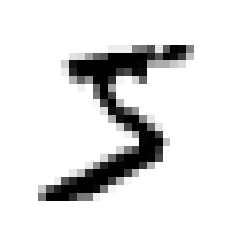

In [7]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')



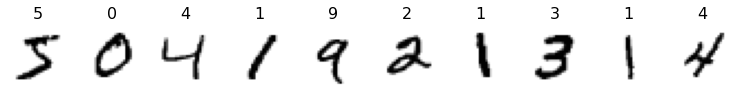

In [8]:
plt.figure(figsize=(13,13))
for i in range(1,11):
    plt.subplot(1,10,i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black',fontsize=16)
plt.show()


### Budowa sieci neuronowej

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Trenowanie modelu

In [10]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2934 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1378 - accuracy: 0.9593
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1040 - accuracy: 0.9689
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0743 - accuracy: 0.9766


## Ocena modelu

In [11]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0666 - accuracy: 0.9787 - 461ms/epoch - 1ms/step


[0.06664848327636719, 0.9786999821662903]

In [12]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.293357,0.914883
1,0.137813,0.959350
2,0.103977,0.968867
3,0.086125,0.973250
4,0.074315,0.976650


In [13]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

## Predykcja na podstawie modelu

In [14]:
predict = model.predict(X_test)
predict

array([[0.000000133645, 0.000000021774, 0.000002883236, ..., 0.99960166    , 0.000000382468, 0.000025264077],
       [0.000000124871, 0.000011102637, 0.9999839     , ..., 0.000000000065, 0.000000017737, 0.            ],
       [0.000000112462, 0.9986998     , 0.000034294208, ..., 0.0009874208  , 0.00015175638 , 0.000001252521],
       ...,
       [0.000000000006, 0.000000001904, 0.000000000468, ..., 0.000009730324, 0.000000703674, 0.00028144714 ],
       [0.0000000865  , 0.000000000882, 0.000000000201, ..., 0.000000000585, 0.00022949814 , 0.000000001921],
       [0.000000013272, 0.            , 0.000000035427, ..., 0.            , 0.00000000033 , 0.000000000001]],
      dtype=float32)

In [15]:
y_pred = np.argmax(predict,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [17]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index

Int64Index([ 115,  247,  259,  320,  321,  340,  381,  445,  495,  582,
            ...
            9698, 9700, 9716, 9729, 9745, 9749, 9768, 9770, 9811, 9839],
           dtype='int64', length=213)

In [18]:
len(misclassified)

213

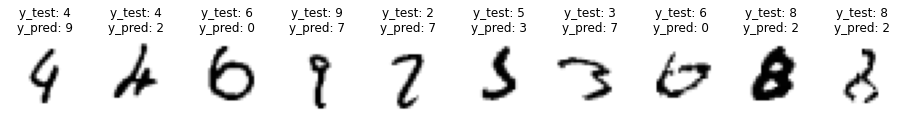

In [20]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='black', fontsize=12)
plt.show()